# Lecture 06
> Complementary tests and trials on what was part of the information in the lecture.

In [ ]:
#| default_exp netana_06

## Imports
We are using `networkx` but `graphtools` is faster so we try this later.

There is also a gpu version of networkx from nvdida that I would like to try later.

In [ ]:
#| export
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


#### What other topics are handeled in lecture 6 completely?

The main topic is communities and in that context as an introduction or important fundamentals connectivity and connectivity decomposition.
## Communities
### Connectivity
### Connectivity Decomposition


#### What is the Kronecker Delta? How is it defined? It was introduced in this lecture at least.
* The Kronecker delta gets the symbol $\delta_{ij}$
* It is part of the Partitioning Chapter
* The Kronecker delta has something to do with the laplacian matrix
* The kronecker delta is a symbol using delta that and two indices ij to describe a duality in a matrix. It is a standard mathematical notation more than anything that is useful here, when we talk about laplacian matrices and the connection / relation of two entities.

#### How is the Laplacian Matrix defined? What is it used for?
* The laplacian Matrix was also introduced here to be important, also in the Networks book.


## Partitioning


Partitioning is the process of separating the nodes of the graph into mutually exclusive groups $P_i$.
$$V = \cup P_i$$

So for example a bisection is separating the graph into two equal size parts.
This seems a bit primitive at first, because you would think that maybe te optimal size of each group wouldn't be exactly half, but this is still used and important in many areas. Application areas are parallel computing and chip design e.g. minimizing the transport of data / interconnection cost between groups.

The simplest version of this would be to divide nodes into groups $g_1$ and $g_2$ which is called graph bisection.
This partitioning creates a cut, so a number of edges crossing the two parts.
The cut size between $g_1$ and $g_2$ is $$R=\frac{1}{2}\sum_{i,j} A_{ij}$$ where $i$ and $j$ are not in the same group.

For each node $i$ the value $s_i =  \begin{cases}
+1: i\in g_1\\
-1: i\in g_2\\
\end{cases}$

Then $\frac{1}{2}(1 - s_is_j  = \begin{cases}
1: i, j \text{ are in different groups}\\
0: i, j \text{ are in the same group}\\
\end{cases}$ and $$R = \frac{1}{4} \sum_{i,j} A_{aj} (1-s_is_j)$$

and then sum over all $i, j$.

With $\sum_{i,j}A_{ij}=\sum_i k_i = \sum_i k_i = \sum_i k_i s_i^2 = \sum_{i,j} k_i \delta_{ij}s_i s_j$ with $k_i$ degree and $\delta_{ij}$ Kronecker delta (1 if equal).
But then $R = \frac{1}{4}\sum_{i,j}(k_i \delta_{ij} - A_{ij})s_i s_j$ by substituting in above formula, thus $R = \frac{1}{4}\sum L_{ij} s_i s_j$ where $L$ is the Laplacian matrix $L = D - A$, $D$ diagonal degree matrix.

$$L = \begin{cases}
k_i: i = j \\
-1 : i <>j \text{ and } i \text{ adjacent } j\\
0 \text{ else}
\end{cases}$$

In matrix form $R = \frac{1}{4} s^T Ls$, where we search for a divising vector $s$ on structure $L$ that minimizes cut size.

**Brute force approach**: Test all bisections, take the best to minimise cut.
Note the number of possible bisections $N_{bs}$: We choose $n_1$ nodes out of $N$, thus $$N_{bs} = \begin{pmatrix}N\\n_1\end{pmatrix} = \frac{N!}{n_1 ! (N-n_1)!} = \frac{N!}{n_1! \cdot n_2!}$$ for a bisection into $n_1, n_2$ nodes.


Minimizing this the size of this cut is a major problem here which is VERY hard because testing for it would need many comparisons.
If we only want to bisect into equal sizes $\approx \frac{2^{n + \frac{1}{2}}}{\sqrt{\pi n} }$:\
$N = 10 \rightarrow 252$ bisections to test\
$N = 100 \rightarrow 10^{29}$ bisections to test

But there are algorithms that use heuristics to solve this problem efficiently. For example the Kernighan-Lin algorithm.

#### What is this R that we are calculating here? Has this occured before?
The $R$ is the cut-size.



### Kernighan-Lin algorithm for Partitioning of Networks
The Kernighan-Lin algorithm is one of the most popular algorithms for solving the two-way partitioning problem.
The algorithm was described first in [this](https://doi.org/10.1002/j.1538-7305.1970.tb01770.x) paper, though the explanation here is mostly in line with the presentation in this [video](https://www.youtube.com/watch?v=GsMZYDBFJv4).

The algorithm uses iterative improvement, starting at an initial partition of a network into parts $(A, B)$ such that $|A|=n=|B|$, and $A\cap B = \emptyset$.
Now $P = {A, B}$ is the initial partition and $P^* = {A^*, B^*}$ is the optimum partition.
Now to get to this optimum partition $P^*$ from $P$, one has to swap a subset $X$ of $A$ with a subset $Y$ of $B$ such that,\
* $(1) |X| = |Y|$
* $(2) X = A\cap B^*$
* $(3) Y = A^* \cap B$

So essentially in each step we find a subset $X$ in $A$ and $Y$ in $B$, that are the same size, so when we swap these two the cut size of the two partitions improves. Obviously there is an optimal solution that can be reached here of a minimal cut size between two partitions of the same size. Finding this is very costly, but the Kernighan-Lin algorithm gives us a way to compute this relatively efficiently.

We define the external cost of node $a$ $E_a$ as:
> Consider any node $a$ in block $A$. The contribution of node $a$ to the cutset is called the external cost of a and is denoted as $E_a$, where $E_a = \sum_{v\in B}c_{av}$

and the internal cost $I_a$ as:
> The internal cost $I_a$ of node $a \in A$ is defined as $I_a = \sum_{v\in A}c_{av}$

Moving node $a$ from block $A$ to block $B$ would increase the value of the cutset by $I_a$ and decrease it by $E_a$.
Therefore, the benefit/profit of moving $a$ from $A$ to $B$ is $D_a = E_a - I_a$




To maintain balanced partition, we must move a node from $B$ to $A$ each time we move a node from $A$ to $B$.
The effect of swapping two modules $a\in A$ with $b\in B$ is characterized as follows.

> If two elements $a\in A$ and $b\in B$ are interchanged, the reduction in the cost is given by $g_{ab} = D_a + D_b - 2c_{ab}$

Swapping affects nodes attached to the swapped nodes
> If two elements $a\in A$ and $b\in B$ are interchanged, then the new $D$-values, indicated by $D'$, are given by
> $$D'_x = D_x + 2c_{xa} - 2c_{xb}, \forall x \in A - \{a\}$$
> $$D'_y = D_y + 2c_{yb} - 2c_{ya}, \forall y \in B - \{b\}$$

Consider a node $x \in A - \{a\}$: \
since $b$ has entered partition $A$, the internal cost of $x$ increases by $c_{xb}$.\
Similarly, since $a$ has entered the opposite partition $B$; the internal cost of $x$ must be decreased by $c_{ax}$.\
The new internal cost of $x$ therefore is $I'_x = I_x - c_{xa} + c_{xb}$

Since $b$ has entered partition $A$, the external cost of $x$ decreases by $c_xb$.\
Similarly, since $a$ has entered the opposite partition $B$; the external cost of $x$ must be increased by $c_{xa}$.\
The new external cost of $x$ therefore is $E'_x = E_x + c_{xa} - c_{xb}$

For any node $x \in A - \{a\}$, we define updated $D$ value as
$$D'_x = E'_x - I'_x$$
$$D'_x = D_x + 2 c_{xa} - 2 c_{xb}$$

Similarly, the new $D$-value of $y \in B - \{ b\}$ is $$D'_y = E'_y - I'_y = D_y + 2c_{yb} - 2c_{ya}$$

Notice that if a module $'x'$ is neither connected to $'a'$ nor to $'b'$ then $c_{xa} = c_{xb} = 0, and, D'_x = D_x$.



#### Overview KL algorithm
* Compute $g_{ab}$ for all $a\in A$ and $b \in B$.
* Select the pair $(a_1, b_1)$ with maximum gain $g_1$ and lock $a_1$ and $b_1$.
* Update the $D$ values of remaining free nodes and re-compute the gains.
* Then a second pair $(a_2, b_2)$ with maximum gain $g_2$ is selected and locked. Hence the gain of swapping the pair $(a_1, b_1)$ followed by the $(a_2, b_2)$ swap is $G_2 = g_1 + g_2$.
* Continue selecting $(a_3, b_3), ..., (a_i, b_i), ..., (a_n, b_n)$ with gains $g_3, ..., g_i, ..., g_n$.
* The gain of making the swap of the first $k$ pairs is $G_k = Eg_i$. If there is no $k$ such that $G_k > 0$ then the current partition cannot be improved; otherwise choose the $k$ that maximizes $G_k$, and make the interchange of $\{a_1, a_2, ..., a_k\}$ with $\{b_1, b_2, ..., b_k\}$ permanent.

#### Algorithm described in the slides
The algorithm is a simple, well-established heuristic to solve the partitioning problem.
Input: Edge-weighted graph\
Output: Bisection that minimizes cut-weight (or number of edges)

Kernighan-Lin maintains bisection from some start bisection and improves it in several steps until no further improvement can be found.

Partition a network into two groups of predefined size. Arbitrary start partition.

One pass:
* Inspect each a pair- s  of nodes (one node from each group). Identify the pair that results in the largest reduction of the cut size if we swap them.
* Swap them. If no pair reduces the cut size, we can swap the pair that increases the cut size the least.
* The process is repeated until each node is moved once (lock moved nodes).
* Find gain maximizing series (prefix) of steps - min cut cost encountered.

Repeat until no gain possible.

How to calculate cost/gain? For unweighted (similar for weighted case):\
Let the internal degree $k_i^{int}$ of  node $i$ be the number of links to other nodes in its partition $C$, external degree $k_i^{ext}$ number of links to the rest.

Cost reduction for moving $i$: $D_i = k_i^{ext} - k_i^{int}$

Cost reduction (gain) for swapping  $i$ and $j$: $g_{ij} = D_i + D_j - 2c_{ij}$ where $c_{ij}$ are the cost  of links between $i$ and $j$ (double counted in the $D$s but don't provide gain)

Update of cost reduction values (for C, similar for other partition):\
$D'_x = D_x + 2c_{xi} - 2c_{xj}, x\in C - \{i\}$ (gain external and loose internal)\
(no change if not connected to $i, j$)



Note that swapping gain might be negative - densely connected subgraphs that need to be swapped as a whole for gain.

Running time (simple version): Gain computation quadratic, major cost, each node moded $= \mathcal{O}(n^3)$

Instead: Sort $D$ values for each partition $\mathcal{O}(n\log n)$. Maintain best gain $g_max$ found so far. If need to compute gain $m_{lm} < g_{max}$ we don't need to compute $g_{kp}$ for $k>l, p>m$ (if $c_{xy}$ non-negative). $\mathcal{O}(n^2 \log n)$.

With random start, results  change - multiple runs.

Extensions:
* Swap minimum partition cardinality for unequal splits
* K-way partitioning for more than two partitions.
* Rather as improvement that stand-alone.




In [ ]:
#| export
n = 10

In [ ]:
#| export

# Generate a random tree using the Prüfer sequence approach
def generate_random_tree(num_nodes, seed=None):
    if seed is not None:
        np.random.seed(seed)
    # Generate a Prüfer sequence of length (num_nodes - 2)
    prufer_sequence = np.random.randint(0, num_nodes, size=(num_nodes - 2))
    # Initialize degree of each node to 1
    degree = [1] * num_nodes
    for node in prufer_sequence:
        degree[node] += 1
    # Initialize the tree's edges
    edges = []
    for node in prufer_sequence:
        for i in range(len(degree)):
            if degree[i] == 1:  # Find the first leaf node
                edges.append((i, node))
                degree[i] -= 1
                degree[node] -= 1
                break
    # Add the final edge
    u, v = [i for i in range(len(degree)) if degree[i] == 1]
    edges.append((u, v))
    return nx.Graph(edges)

In [ ]:
# Generate three types of trees
line_tree = nx.path_graph(n)  # Line/tree path
star_tree = nx.star_graph(n - 1)  # Center node 0, all others connect to it
random_tree = generate_random_tree(n, seed=42)  # Random tree

In [ ]:
#| export

# Function to draw trees side-by-side
def draw_trees(trees, titles):
    fig, axes = plt.subplots(1, len(trees), figsize=(15, 5))
    for ax, tree, title in zip(axes, trees, titles):
        pos = nx.spring_layout(tree, seed=42)  # Use spring layout for consistency
        nx.draw(tree, pos, with_labels=True, ax=ax, node_color="lightblue", edge_color="gray", node_size=500)
        ax.set_title(title)
    plt.show()

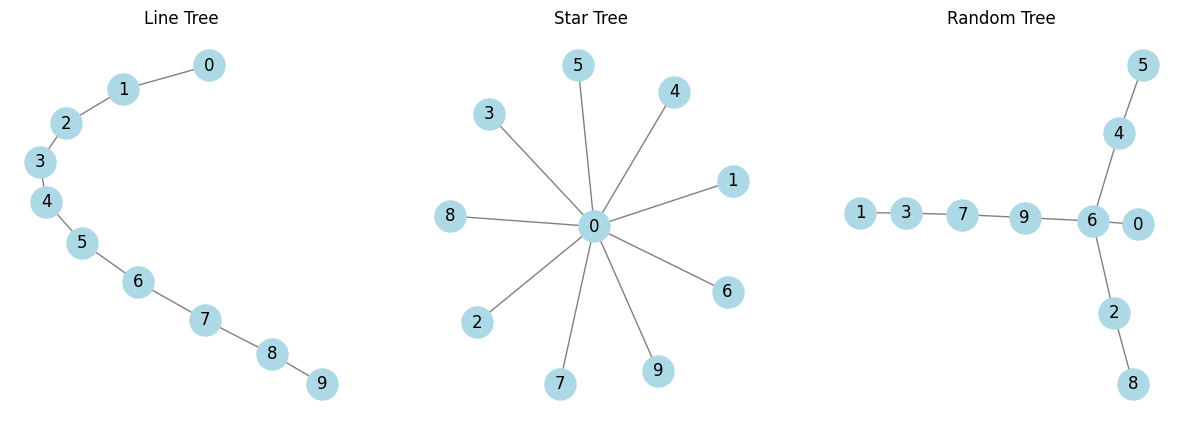

In [ ]:
# Draw the trees
draw_trees([line_tree, star_tree, random_tree], ["Line Tree", "Star Tree", "Random Tree"])

In [ ]:


# Settings
n_max = 10
k_bar = 1.2

for n in range(10, n_max, 10):
    m = int((k_bar * n) / 2)
    G = nx.gnm_random_graph(n, m)

    # Get the size of the largest component
    largest_cc = max(nx.connected_components(G), key=len)
    G_sub = G.subgraph(largest_cc)

    # Plot largest component only
    plt.figure(figsize=(5, 5))
    pos = nx.spring_layout(G_sub)
    nx.draw(G_sub, pos, node_color='lightblue', with_labels=False, node_size=30)
    plt.title(f'n = {n}, k̄ = {k_bar}, giant component size = {len(G_sub)}')
    plt.axis('off')
    plt.show()


In [ ]:
from scipy.optimize import fsolve

In [ ]:
#| export

def giant_component_size(k):
    # Solve S = 1 - exp(-k * S)
    func = lambda S: S - (1 - np.exp(-k * S))
    S_guess = 0.0001 if k < 1 else 0.5
    S_solution, = fsolve(func, S_guess)
    return S_solution

/tmp/ipykernel_193901/2603444820.py:7: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  S_solution, = fsolve(func, S_guess)


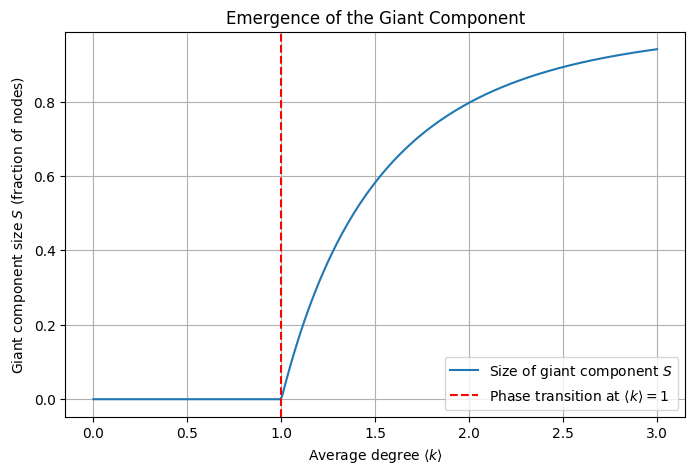

In [ ]:

k_vals = np.linspace(0, 3, 300)
S_vals = [giant_component_size(k) for k in k_vals]

plt.figure(figsize=(8, 5))
plt.plot(k_vals, S_vals, label='Size of giant component $S$')
plt.axvline(1, color='red', linestyle='--', label='Phase transition at $\\langle k \\rangle = 1$')
plt.xlabel('Average degree $\\langle k \\rangle$')
plt.ylabel('Giant component size $S$ (fraction of nodes)')
plt.title('Emergence of the Giant Component')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#| export
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy.optimize import fsolve
import ipywidgets as widgets
from IPython.display import display

In [ ]:
#| export
# Function to solve S = 1 - exp(-k * S)
def giant_component_size(k):
    if k <= 0:
        return 0.0
    func = lambda S: S - (1 - np.exp(-k * S))
    S_guess = 0.0001 if k < 1 else 0.5
    S_solution, = fsolve(func, S_guess)
    return S_solution

In [ ]:
#| export

# Function to update the graph
def update_graph(n=100, k_bar=0.5):
    m = int(k_bar * n / 2)
    G = nx.gnm_random_graph(n, m)

    # Theoretical giant component size
    S_theory = giant_component_size(k_bar)
    theoretical_size = int(S_theory * n)

    # Actual largest component
    if nx.is_connected(G):
        largest_cc_nodes = list(G.nodes())
    else:
        largest_cc_nodes = max(nx.connected_components(G), key=len)

    largest_cc = G.subgraph(largest_cc_nodes)

    # Plotting
    plt.figure(figsize=(6, 6))
    pos = nx.spring_layout(G, seed=42)
    node_colors = ['red' if node in largest_cc_nodes else 'lightgray' for node in G.nodes()]
    nx.draw(G, pos, node_color=node_colors, node_size=40, with_labels=False, edge_color='gray')
    plt.title(f'n = {n}, k_bar = {k_bar:.2f}\nGiant component size = {len(largest_cc)} (theory: ~{theoretical_size})')
    plt.axis('off')
    plt.show()


In [ ]:
#| export

# Widgets
n_slider = widgets.IntSlider(value=100, min=20, max=500, step=10, description='Nodes (n):')
k_slider = widgets.FloatSlider(value=0.5, min=0.0, max=3.0, step=0.05, description='Avg. Degree (k̄):')

# Interactive output
widgets.interact(update_graph, n=n_slider, k_bar=k_slider)

interactive(children=(IntSlider(value=100, description='Nodes (n):', max=500, min=20, step=10), FloatSlider(va…

<function __main__.update_graph(n=100, k_bar=0.5)>